# Testing the Inclusion of the LDHB pathway
The original equations for glucose ($G$), pyruvate ($P$), lactate ($L$) and inflammation ($I$):
$$\frac{dG}{dt}=\Lambda(I) (G_E-G) -\frac{V_{P}G}{K_P +G}h^+_{1}(L)$$
$$\frac{dP}{dt}=\frac{V_{P}G}{K_P +G}h^+_{1}(L) -\Delta(I)\frac{V_{L}P}{K_L + P}h^+_{2}(L)-(1-\Delta(I))\frac{V_{T}P}{K_T + P}$$
$$\frac{dL}{dt}=\Delta(I)\frac{V_{L}P}{K_L + P}h^+_{2}(L) + \Sigma(I)(L_E-L)$$
$$\frac{dI}{dt}=\frac{a_{LI}L}{b_{LI}+L}-d_II$$
Where
$$ \Lambda(I) = \frac{a_{IG}I }{b_{IG} + I} + \lambda$$
$$\Sigma(I) = \frac{a_{IL}I  }{b_{IL} + I}+\sigma$$
$$ \Delta(I) = \frac{a_{IL}I}{b_{IL} + I}+\delta$$
$$h^+_{1}(L) = H_1 + \frac{a_{LG}L}{b_{LG}+L}$$
$$h^+_{2}(L) = H_2 + \frac{a_{LP}L}{b_{LP}+L}$$

are modified by including the pathway for LDHB, which converts lactate to pyruavate, captured with a hill function (last term) in the equations for pyruvate and lactate:
$$\frac{dP}{dt}=\frac{V_{P}G}{K_P +G}h^+_{1}(L) -\Delta(I)\frac{V_{L}P}{K_L + P}h^+_{2}(L)-(1-\Delta(I))\frac{V_{T}P}{K_T + P} + \frac{V_{B}L}{K_B+L}$$
$$\frac{dL}{dt}=\Delta(I)\frac{V_{L}P}{K_L + P}h^+_{2}(L) + \Sigma(I)(L_E-L)- \frac{V_{B}L}{K_B+L}$$

We compare simulations for both the original and modified equations below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# to plot multiple plots
import pylab
import time
import random
import matplotlib.pyplot as plt

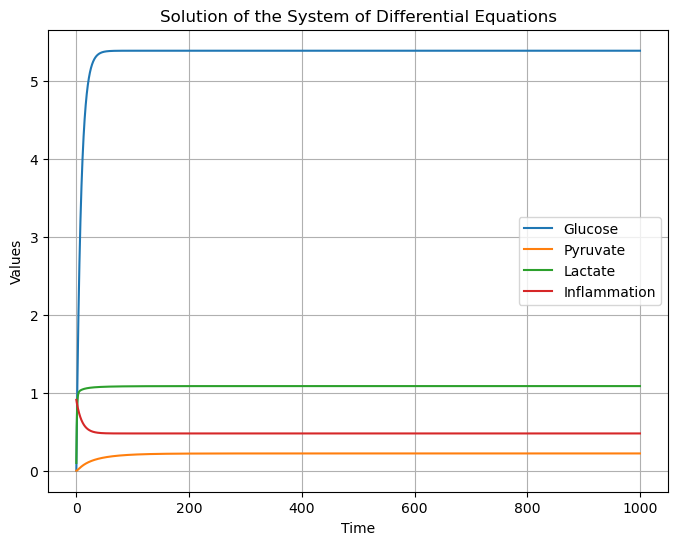

In [2]:
def f(y,t,paras):
    G = y[0]
    P = y[1]
    L = y[2]
    I = y[3]

# build a few functions for short hand
    # inflammation upregulates processes
    lambdafunction =(lambda1 + aIG * I/(bIG + I)) # when I = 0, this is the constant lambda1
    deltafunction = delta + aIP * I/(bIP + I) # when I = 0, this is constant delta
    sigmafunction = sigma + aIL * I/(bIL + I) # when I = 0, this is constant sigma
    # lacate upregulates processes with epigenetic regulation
    h1 = H1 + aLG * L/(bLG + L) # increases glucose to pyruvate flux, function of lactate
    h2 = H2 + aLP * L/(bLP + L) # increaes pyruvate to lactate flux, function of lactate
    inflam = aLI * L/(bLI + L) # lactate increase inflammation
    
    
    f0 = lambdafunction * (GE - G) -  (VP * G)/(KP + G) * h1
    f1 = (VP * G)/(KP + G) * h1 - deltafunction * (VL * P)/(KL + P) * h2 - (1-deltafunction) * (VT * P)/(KT + P)
    f2 = deltafunction * (VL * P)/(KL + P) - sigmafunction * (L - LE)
    f3 = inflam - dI * I # exponential decay
    
    return [f0, f1, f2, f3]

# initial conditions
G0 = 0  # initial glucose
P0 = 0  # initial pyruvate
L0 = .1  # initial lactate
I0 = .909  # initial inflammation

y0 = [G0, P0, L0, I0] # initial condition vector
t = np.linspace(0,1000,100000) # time grid, 0 to 1000 in 100000 steps


# baseline parameter values
lambda1 = .0755 # glucose import 
GE = 5.5 # external glucose
VP = .123 # glucose to pyruvate
KP = 1.7 #glucose to pyruvate
delta = .95 # proportion of pyruvate sent to lactate, 0<=delta<=1
VL = .14 # pyruvte to lactate
KL = .125 # pyruvte to lactate
VT = .15 # pyruvate to TCA
KT = .02 # pyruvate to TCA
sigma = 1 # lactate export
LE = 1 # external lactate

# inflammation parameters
aLI = .05
bLI = .05
dI = .1

# feeback pieces
# convention: subscript IG means inflammation's influence on glucose

# inflammation influence
aIG = .05
bIG = .05
aIP = .05
bIP = .05
aIL = .05 # inflammation influence pyruvate to lactate flux and lactate export
bIL = .05 

# lactate influence
aLG = .05 
bLG = .05
H1 = .1
aLP = .05 
bLP = .05
H2 = .1

# Define parameters
params = (lambda1, GE, VP, KP, delta, VL, KL, VT, KT, sigma, LE, aLI, bLI, dI, aIG, bIG, aIP, bIP, 
          aIL, bIL, aLG, bLG, H1, aLP, bLP, H2)

soln = odeint(f, y0, t, args=(params,))

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(t, soln)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Solution of the System of Differential Equations')
plt.legend(['Glucose', 'Pyruvate', 'Lactate', 'Inflammation'])
plt.grid(True)
plt.show()

### Test adding LDHB pathway

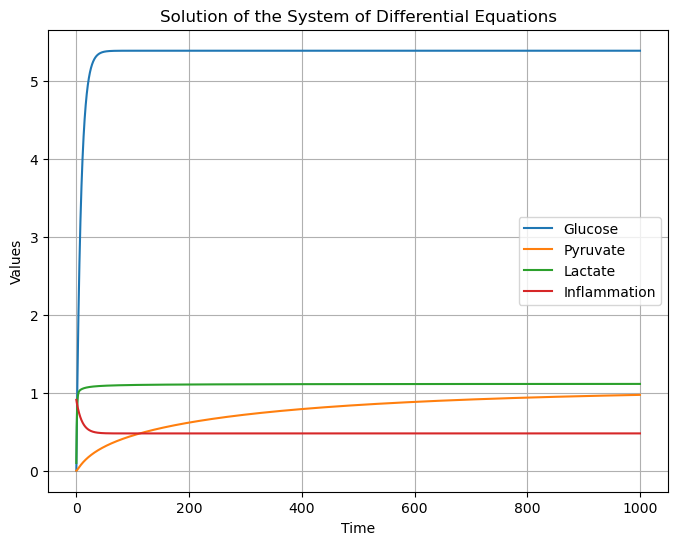

In [4]:
def f(y,t,paras):
    G = y[0]
    P = y[1]
    L = y[2]
    I = y[3]

# build a few functions for short hand
    # inflammation upregulates processes
    lambdafunction =(lambda1 + aIG * I/(bIG + I)) # when I = 0, this is the constant lambda1
    deltafunction = delta + aIP * I/(bIP + I) # when I = 0, this is constant delta
    sigmafunction = sigma + aIL * I/(bIL + I) # when I = 0, this is constant sigma
    # lacate upregulates processes with epigenetic regulation
    h1 = H1 + aLG * L/(bLG + L) # increases glucose to pyruvate flux, function of lactate
    h2 = H2 + aLP * L/(bLP + L) # increaes pyruvate to lactate flux, function of lactate
    inflam = aLI * L/(bLI + L) # lactate increase inflammation
    
    
    f0 = lambdafunction * (GE - G) -  (VP * G)/(KP + G) * h1
    # modified next 2 equations with Hill function added and subtracted, respectively for conversion of lactate to pyruvate
    f1 = (VP * G)/(KP + G) * h1 - deltafunction * (VL * P)/(KL + P) * h2 + (VB * L)/(KB + L) - (1-deltafunction) * (VT * P)/(KT + P)
    f2 = deltafunction * (VL * P)/(KL + P) - sigmafunction * (L - LE) - (VB * L)/(KB + L)
    f3 = inflam - dI * I # exponential decay
    
    return [f0, f1, f2, f3]

# initial conditions
G0 = 0  # initial glucose
P0 = 0  # initial pyruvate
L0 = .1  # initial lactate
I0 = .909  # initial inflammation

y0 = [G0, P0, L0, I0] # initial condition vector
t = np.linspace(0,1000,100000) # time grid, 0 to 1000 in 100000 steps


# baseline parameter values
lambda1 = .0755 # glucose import 
GE = 5.5 # external glucose
VP = .123 # glucose to pyruvate
KP = 1.7 #glucose to pyruvate
delta = .95 # proportion of pyruvate sent to lactate, 0<=delta<=1
VL = .14 # pyruvte to lactate
KL = .125 # pyruvte to lactate
VT = .15 # pyruvate to TCA
KT = .02 # pyruvate to TCA
sigma = 1 # lactate export
LE = 1 # external lactate
VB = .01 # added for LDHB pathway
KB = 1 # added for LDHB pathway

# inflammation parameters
aLI = .05
bLI = .05
dI = .1

# feeback pieces
# convention: subscript IG means inflammation's influence on glucose

# inflammation influence
aIG = .05
bIG = .05
aIP = .05
bIP = .05
aIL = .05 # inflammation influence pyruvate to lactate flux and lactate export
bIL = .05 

# lactate influence
aLG = .05 
bLG = .05
H1 = .1
aLP = .05 
bLP = .05
H2 = .1

# Define parameters
params = (lambda1, GE, VP, KP, delta, VL, KL, VT, KT, sigma, LE, aLI, bLI, dI, aIG, bIG, aIP, bIP, 
          aIL, bIL, aLG, bLG, H1, aLP, bLP, H2)

soln = odeint(f, y0, t, args=(params,))

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(t, soln)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Solution of the System of Differential Equations')
plt.legend(['Glucose', 'Pyruvate', 'Lactate', 'Inflammation'])
plt.grid(True)
plt.show()